# Machine Learning Model Implementations
This file includes machine learning model implementations and optimization steps.
The models used in order is as follows:
1. KNN classifier
2. ...


### Import Packages and Load Dataset

Labels come from 2 different PSG systems: Remlogic and Somnomedics. Sleep stage labels are as follows:

0 = Awake = SLEEP-S0 \
1 = REM   = SLEEP-REM \
2 = Light = SLEEP-S1 and  SLEEP-S2 \
3 = Deep  = SLEEP-S3 

EMFIT is the piezoelectric mat and Somnofy is the radar.

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import numpy as np
from helpers import *

In [2]:
subjectID = PARTICIPANT_IDS[0]
sleep_stages, nan_counts = impute_data(subjectID)
print(nan_counts)

(0, 0, 0)


In [3]:
labels = sleep_stages["sleep_stage_num_psg"]
features = sleep_stages.drop(columns="sleep_stage_num_psg")
size = sleep_stages.shape[0]
divide_ind = int(size*.7)

In [4]:
print(accuracy_score(sleep_stages["sleep_stage_num_somnofy"][:divide_ind], labels[:divide_ind]))
print(accuracy_score(sleep_stages["sleep_stage_num_emfit"][:divide_ind], labels[:divide_ind]))

0.5442278860569715
0.1424287856071964


<AxesSubplot:xlabel='timestamp_local'>

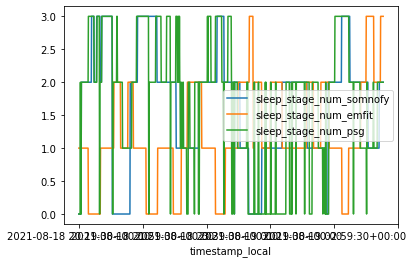

In [5]:
sleep_stages.plot()

### KNN Classifier

In [6]:
knn_classifier = KNeighborsClassifier(n_neighbors=7)
knn_classifier.fit(features[:divide_ind], labels[:divide_ind])

KNeighborsClassifier(n_neighbors=7)

In [7]:
preds = knn_classifier.predict(features[divide_ind:])

In [8]:
# Accuracy score 
print(accuracy_score(preds, labels[divide_ind:]))

# Confusion Matrix and Classification Report 
print(confusion_matrix(preds, labels[divide_ind:]))
print(classification_report(preds, labels[divide_ind:]))

0.5644599303135889
[[  0  16   2   0]
 [ 12  31  33   0]
 [ 15  23 108  21]
 [  0   0   3  23]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        18
         1.0       0.44      0.41      0.42        76
         2.0       0.74      0.65      0.69       167
         3.0       0.52      0.88      0.66        26

    accuracy                           0.56       287
   macro avg       0.43      0.48      0.44       287
weighted avg       0.60      0.56      0.57       287

